## Metody Nieparametryczne w Statystyce
# Zadanie 6
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd faI rodzaju) w teście istotności współczynnika korelacji w przypadku, gdy dane pochodzą z rozkładów 𝜒2 (o różnych stopniach swobody). W trakcie symulowania danych należy pamiętać, by dane spełniały hipotezę główną. Porównać uzyskane wyniki dla wsp. korelacji Pearsona i Spearmana.

### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek.

In [1]:
import numpy as np, pandas as pd
from scipy.stats import pearsonr, spearmanr, chi2
from tqdm import tqdm
import matplotlib.pyplot as plt

2. Badanie odsetków odrzuceń prawdziwej hipotezy głównej dla dwóch wektorów liczbowych generowanych z rozkładów chi kwadrat o różnych stopniach swobody, ale o tej samej wartości oczekiwanej. 

pearson test


100%|██████████| 140/140 [01:01<00:00,  2.27it/s]


spearman test


100%|██████████| 140/140 [00:38<00:00,  3.62it/s]


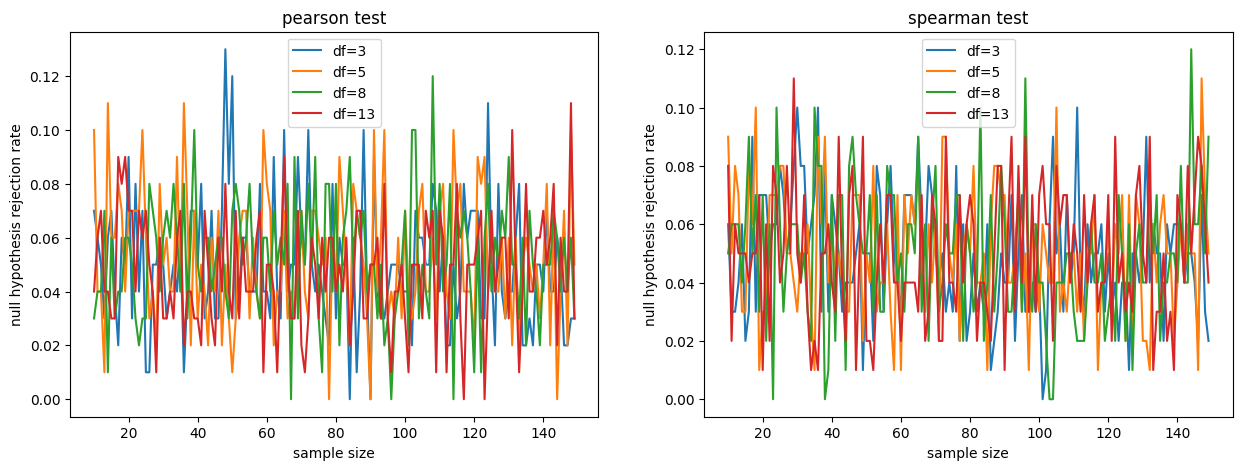

In [2]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for k in range(0, 2):    
    results = pd.DataFrame(columns=["df=3", "df=5", "df=8", "df=13"])
    buf = []
    print("pearson test" if k == 0 else "spearman test")
    for n in tqdm(range (10, 150)):
        for i in range (0, 100):
            for df in [3, 5, 8, 13]:
                #generowanie dwóch wektorów liczbowych z rozkładu normalnego
                x1 = chi2.rvs(size=n, df=df)
                x2 = chi2.rvs(size=n, df=df)
                
                #testy na istotność współczynnika korelacji
                if k == 0:
                    buf.append(pearsonr(x1, x2)[1] < 0.05)
                else:
                    buf.append(spearmanr(x1, x2)[1] < 0.05)

        results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(title="pearson test" if k == 0 else "spearman test", ax = axes[k],
                xlabel="sample size", ylabel="null hypothesis rejection rate")

Niezależnie od liczby stopni swobody oraz wielkości próbki, dla obu testów wyniki oscylują w okolicy poziomu istotności testu, co świadczy o tym, że oba testy są skuteczne w rozpoznawaniu korelacji między danymi z różnych rozkładów normalnych.